**1. Framing the problem statement**

Here we are atrying the predict the iris category.It is a classification modelling.Target variable is **Species**

In [15]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing dataset
data = pd.read_csv('Iris.csv')

print(data.head())
print(data.shape)
print(data.columns)

test_copy= pd.read_csv('Iris.csv')

# we will remove the Id as it is unique and is irrelevant
# data.drop('Id',axis = 1,inplace = True)



print(data.shape)
print(data.columns)


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
(150, 6)
Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [16]:
# categorical columns 
catCols = data.select_dtypes('object').columns
catCols=list(set(catCols))
# we will remove the Species as it is unique and is irrelevant
catCols.remove('Species')
print('categorical columns:',catCols)

numCols = data.select_dtypes('number').columns
numCols = list(set(numCols))
numCols.remove('Id')
print('numerical columns:',numCols)


# apply label encoder on y

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Species'] = labelencoder.fit_transform(data['Species'])
y = data['Species']

print(data['Species'].value_counts())


categorical columns: []
numerical columns: ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm']
2    50
1    50
0    50
Name: Species, dtype: int64


**2.  Hypothesis Testing**
-------------------------------------------------------------------Null Hypothesis:there is no relationship between predictor and target

Alternate Hypothesis:There is significant relationship between predictor and target.

In [17]:
# we will carry out z-test as below for numeric columns
from statsmodels.stats import weightstats as stests


significant_num = []
in_significant_num = []
for i in numCols:
  p_val = stests.ztest(data[i],data['Species'])
  p_val = p_val[1]
  print('columns:',i)
  print('p val:',p_val)

  if p_val < 0.05 :
    status = "Reject Null Hypothesis,Significant predictors"
    print('status:',status)
    significant_num.append(i)
  else:
    status = 'Accept Null Hypothesis,Insignificant predictors'
    print('status:',status)
    in_significant_num.append(i)

print("significant:",significant_num,len(significant_num))
print("Insignificant:",in_significant_num,len(in_significant_num))


columns: PetalWidthCm
p val: 0.029765570131652826
status: Reject Null Hypothesis,Significant predictors
columns: PetalLengthCm
p val: 1.4405345778729125e-67
status: Reject Null Hypothesis,Significant predictors
columns: SepalLengthCm
p val: 0.0
status: Reject Null Hypothesis,Significant predictors
columns: SepalWidthCm
p val: 3.3059906723078414e-162
status: Reject Null Hypothesis,Significant predictors
significant: ['PetalWidthCm', 'PetalLengthCm', 'SepalLengthCm', 'SepalWidthCm'] 4
Insignificant: [] 0


In [18]:
# as there is no categorical feature,we can easily see the ols summary
import statsmodels.api as sm
a = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
print(a)
model = sm.OLS(data['Species'],a).fit()
model_prediction = model.predict(a)
model.details = model.summary()
print(model.details)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]
                                 OLS Regression Results                                
Dep. Variable:                Species   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (

3.Exploratory Data Analysis (EDA)
-----------------------------------------------------------------

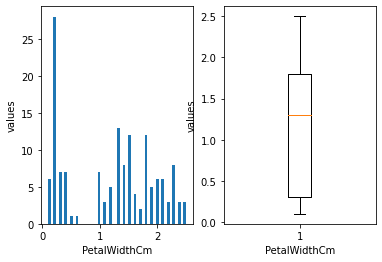

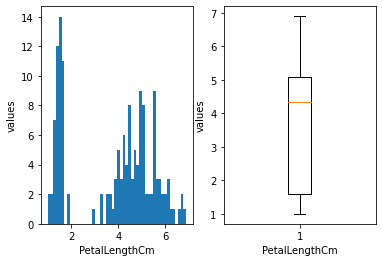

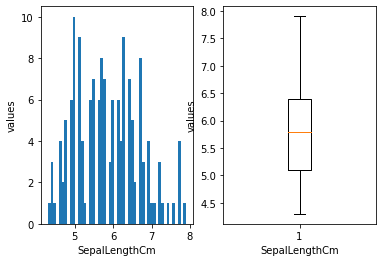

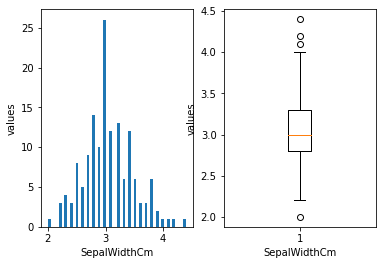

In [19]:
# 1.Univariate analysis of numerical columns with  histogram/distplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('values')
  plt.show()


                     Id  SepalLengthCm  ...  PetalWidthCm   Species
Id             1.000000       0.716676  ...      0.899759  0.942830
SepalLengthCm  0.716676       1.000000  ...      0.817954  0.782561
SepalWidthCm  -0.397729      -0.109369  ...     -0.356544 -0.419446
PetalLengthCm  0.882747       0.871754  ...      0.962757  0.949043
PetalWidthCm   0.899759       0.817954  ...      1.000000  0.956464
Species        0.942830       0.782561  ...      0.956464  1.000000

[6 rows x 6 columns]


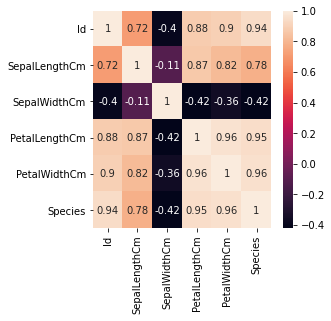

In [20]:
# noted:outliers are present in SepalWidthCm

# 2.Bivariate analysis of numerical columns with  correlation matrix

import seaborn as sns
matrix = data.corr()
print(matrix)

fig,ax = plt.subplots(figsize = (4,4))
sns.heatmap(matrix,annot = True)

**5.Missing Values**
-------------------------------------------------------------

In [21]:
data.isnull().sum()
# no null values ,so we can proceed

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**6. Towards building models**
--------------------------------------------------------------

In [22]:
# split dataset into train test

from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
X_train,X_test,y_train,y_test=train_test_split(data,y,random_state =0,test_size =0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

# print(X_train.shape, y_train.shape)

(120, 6) (120,)
(30, 6) (30,)


In [28]:
# we will import robust scaler as its is powerfulagainst outliers
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()


x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)



[[ 0.43809524  0.         -0.4         0.20833333  0.6875      0.5       ]
 [-0.22222222  0.14285714 -1.6        -0.09722222 -0.1875      0.        ]
 [-0.59047619 -0.21428571  2.4        -0.81944444 -0.6875     -0.5       ]
 [ 0.34920635  1.07142857 -0.2         0.54166667  0.3125      0.5       ]
 [-0.92063492 -0.57142857  0.8        -0.79166667 -0.6875     -0.5       ]
 [ 0.26031746  0.35714286  0.6         0.45833333  0.75        0.5       ]
 [-0.5015873  -0.57142857  1.         -0.84722222 -0.625      -0.5       ]
 [ 0.08253968  0.64285714  0.2         0.09722222  0.125       0.        ]
 [-0.04444444  0.71428571 -0.4         0.125       0.0625      0.        ]
 [-0.10793651  0.21428571 -0.4        -0.09722222  0.          0.        ]
 [ 0.69206349  0.21428571 -0.8         0.34722222  0.0625      0.5       ]
 [-0.36190476  0.42857143  0.4         0.04166667  0.125       0.        ]
 [-0.08253968  0.21428571 -0.4         0.09722222 -0.0625      0.        ]
 [-0.32380952  0.5       

In [24]:
from sklearn import model_selection
from numpy import abs

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))


for name,model in models:
  cv_score = model_selection.cross_val_score(model,x_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))

  
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

name:--->> Logistic Regression
----------------------------------
CV mean Score :0.9912870929175277,CV min:0.9128709291752769,CV std :0.026138721247416927
----------------------------------
name:--->> Linear svc
----------------------------------
CV mean Score :0.9956435464587639,CV min:0.9128709291752769,CV std :0.018989340738478303
----------------------------------
name:--->> Random forest classifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> knn 
----------------------------------
CV mean Score :0.9869306393762916,CV min:0.9128709291752769,CV std :0.03111130116701005
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------
name:--->> Decision TreeClassifier
----------------------------------
CV mean Score :1.0,CV min:1.0,CV std :0.0
----------------------------------


In [29]:
# Selecting a model
# ------------------------------------------------------------------------

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
Y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0